# Phase 2

In [1]:
# Necessary library imports
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from datetime import datetime
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [2]:
#Reading and Displaying the data using dataset
df = pd.read_csv('US_Accidents_March23.csv')
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
#Data Preprocessing
df = df.dropna()
df_2 = df.drop(['Source', 'Start_Lat','Start_Lng', 'End_Lat', 'End_Lng', 'Description', 
                  'Street', 'County','Country', 'Zipcode', 'Airport_Code', 'Weather_Timestamp', 
                  'Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 
                  'Wind_Direction', 'Precipitation(in)', 'Nautical_Twilight', 'Civil_Twilight', 
                  'Astronomical_Twilight'], axis=1)
dat = df_2['Timezone'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Timezone'].replace(uni, inplace=True)

##############################################
dat = df_2['Junction'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Junction'].replace(uni, inplace=True)

#############################################
dat = df_2['No_Exit'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))
# print(dict_dat)
df_2['No_Exit'].replace(uni, inplace=True)

##############################################
dat = df_2['Railway'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Railway'].replace(uni, inplace=True)

#############################################
dat = df_2['Roundabout'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Roundabout'].replace(uni, inplace=True)

#################################################
dat = df_2['Station'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Station'].replace(uni, inplace=True)

############################################
dat = df_2['Stop'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Stop'].replace(uni, inplace=True)

###########################################
dat = df_2['Traffic_Calming'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Traffic_Calming'].replace(uni, inplace=True)

###################################################
dat = df_2['Traffic_Signal'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Traffic_Signal'].replace(uni, inplace=True)

######################################################
dat = df_2['Turning_Loop'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Turning_Loop'].replace(uni, inplace=True)

#################################################
dat = df_2['Sunrise_Sunset'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Sunrise_Sunset'].replace(uni, inplace=True)

#################################################
dat = df_2['Amenity'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Amenity'].replace(uni, inplace=True)

#################################################
dat = df_2['Bump'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Bump'].replace(uni, inplace=True)


#################################################
dat = df_2['Crossing'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Crossing'].replace(uni, inplace=True)
#################################################
dat = df_2['Give_Way'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Give_Way'].replace(uni, inplace=True)

rain = ['Light Rain','Rain','Light Freezing Drizzle','Light Drizzle','Heavy Rain','Light Freezing Rain','Drizzle','Light Rain Showers',
        'Light Thunderstorms and Rain','Thunderstorms and Rain','Rain Showers','Heavy Drizzle','Showers in the Vicinity',
        'Thunderstorm','Light Rain Shower','Light Rain with Thunder','T-Storm','Heavy Rain / Windy',
        'Heavy Thunderstorms and Rain','Thunder','Heavy T-Storm','Rain / Windy','Heavy Freezing Rain',
        'Heavy Rain Showers','Rain Shower','Freezing Drizzle','Light Freezing Rain / Windy','Freezing Rain',
        'Heavy Freezing Rain / Windy','Light Rain Shower / Windy','Freezing Rain / Windy','Light Thunderstorm',
        'Heavy Freezing Drizzle','Rain Shower / Windy','Heavy Rain Shower / Windy','Heavy Rain Shower','N/A Precipitation']

cloudy = ['Overcast','Mostly Cloudy','Scattered Clouds','Partly Cloudy','Cloudy','Funnel Cloud','Cloudy / Windy']

snow = ['Light Snow','Snow','Blowing Snow','Light Thunderstorms and Snow','Heavy Snow','Low Drifting Snow',
        'Snow Grains','Snow Showers','Heavy Thunderstorms and Snow','Light Snow / Windy','Light Snow with Thunder',
        'Snow and Thunder','Light Snow Shower','Snow / Windy','Snow and Sleet','Heavy Snow / Windy',
        'Blowing Snow / Windy','Snow and Thunder / Windy','Duststorm','Light Snow Shower / Windy','Light Snow Grains',
        'Heavy Snow with Thunder','Light Snow Showers','Heavy Blowing Snow','Light Blowing Snow','Thunderstorms and Snow',
        'Drifting Snow / Windy','Blowing Snow Nearby','Drifting Snow']

fog = ['Haze','Fog','Shallow Fog','Mist','Smoke','Patches of Fog','Light Freezing Fog',
       'Light Haze','Widespread Dust','Light Fog','Drizzle and Fog','Smoke / Windy','Haze / Windy','Wintry Mix',
       'Wintry Mix / Windy','Fog / Windy','Thunder / Wintry Mix','Mist / Windy','Partial Fog','Thunder / Wintry Mix / Windy',
       'Patches of Fog / Windy','Partial Fog / Windy','Heavy Smoke','Shallow Fog / Windy']

clear = ['Clear','Fair']

windy = ['Blowing Sand','Blowing Dust / Windy','Fair / Windy','Mostly Cloudy / Windy','Light Rain / Windy',
         'Partly Cloudy / Windy','Thunder in the Vicinity','Heavy T-Storm / Windy','Squalls',
        'Sand','Thunder / Windy','T-Storm / Windy','Blowing Dust','Tornado','Light Drizzle / Windy','Widespread Dust / Windy',
         'Light Snow and Sleet / Windy','Snow and Sleet / Windy','Sleet / Windy','Squalls / Windy',
         'Light Sleet / Windy','Sand / Dust Whirlwinds','Drizzle / Windy','Sand / Dust Whirls Nearby','Heavy Sleet',
         'Rain and Sleet','Sand / Dust Whirlwinds / Windy','Dust Whirls','Sleet and Thunder','Heavy Sleet and Thunder',
         'Heavy Sleet / Windy','Sand / Windy']

disaster = ['Volcanic Ash']

hail = ['Hail','Light Ice Pellets','Ice Pellets','Heavy Ice Pellets','Small Hail','Sleet','Light Snow and Sleet',
       'Light Sleet','Thunder and Hail','Light Hail','Heavy Thunderstorms with Small Hail','Thunder and Hail / Windy']


simplified_list = [rain,cloudy,snow,fog,clear,windy,disaster,hail]
counter = 1
for i in simplified_list:
    dat = i
    nums = []
    dict_dat = {}
    for j in range(0,len(dat)):
        nums.append(counter)
    counter += 1
    uni = dict(zip(list(dat),nums))
    df_2['Weather_Condition'].replace(uni, inplace=True)


df_2['Start_Time'] = df_2['Start_Time'].str.split(' ', expand = True)[0]
df_2['End_Time'] = df_2['End_Time'].str.split(' ', expand = True)[1]
df_2['End_Time'] = df_2['End_Time'].str.split('.', expand = True)[0]
df_2.rename(columns={'Start_Time': 'Date'}, inplace=True)
df_2.rename(columns={'End_Time': 'Time'}, inplace=True)

df_2 = df_2.drop_duplicates()

df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2['Date'] = df_2['Date'].dt.strftime('%m-%d-%Y')

df_2

,ID,Severity,Date,Time,Distance(mi),City,State,Timezone,Visibility(mi),Wind_Speed(mph),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
3402762,A-3412645,3,02-08-2016,06:37:08,3.230,Dublin,OH,1,10.0,10.4,...,0,0,0,0,0,0,0,0,0,1
3402767,A-3412650,3,02-08-2016,13:53:43,0.500,Cincinnati,OH,1,10.0,10.4,...,0,0,0,0,0,0,0,0,0,2
3402771,A-3412654,2,02-08-2016,17:51:46,0.521,Cleveland,OH,1,0.5,3.5,...,1,0,0,0,0,0,0,0,0,2
3402773,A-3412656,2,02-08-2016,21:16:43,0.826,Westerville,OH,1,0.5,3.5,...,0,0,0,0,0,0,0,0,0,2
3402774,A-3412657,2,02-08-2016,21:43:50,0.307,Cincinnati,OH,1,3.0,4.6,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,08-23-2019,18:32:01,0.543,Riverside,CA,2,10.0,13.0,...,0,0,0,0,0,0,0,0,0,2
7728390,A-7777758,2,08-23-2019,19:38:23,0.338,San Diego,CA,2,10.0,6.0,...,0,0,0,0,0,0,0,0,0,2
7728391,A-7777759,2,08-23-2019,19:28:49,0.561,Orange,CA,2,10.0,10.0,...,1,0,0,0,0,0,0,0,0,2
7728392,A-7777760,2,08-23-2019,19:29:42,0.772,Culver City,CA,2,10.0,8.0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
# Processing the column "ID"
new_id = []
for i in df_2['ID']:
#     print(i.split('-')[1])
    new_id.append(i.split('-')[1])
df_2['ID'] = new_id

back_up = df_2

In [5]:
# Converting the categorical data into labels 

label_encoder = LabelEncoder()
df_2['City'] = label_encoder.fit_transform(df_2['City'])
df_2['State'] = label_encoder.fit_transform(df_2['State'])

In [6]:
# Creating independent features dataframe

y= df_2['Severity']
X = df_2.drop(columns =['ID','Severity'],inplace = True)

df_2.drop(columns =['Time'],inplace = True)
df_2.drop(columns =['Date'],inplace = True)

In [7]:
# Splitting the data into train and test

X = df_2

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)


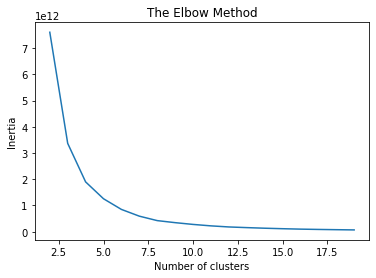

Within-Cluster Sum of Squares (WCSS): 674275091347.1534


In [8]:
# K - Means Clustering

cluster_data = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    cluster_data.append(kmeans.inertia_)
plt.plot(range(2, 20), cluster_data)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=3, init = 'random',random_state=42,algorithm = 'elkan') 

labels = kmeans.fit_predict(X_test)

kmeans.fit(X_test)
wcss = kmeans.inertia_
print('Within-Cluster Sum of Squares (WCSS):', wcss)

In [9]:
# K - Nearest Neighbours 
y_knn_svm = y
X_knn_svm = df_2[['Distance(mi)','Wind_Speed(mph)','Visibility(mi)']]

X_train_knn_svm, X_test_knn_svm, y_train_knn_svm, y_test_knn_svm = train_test_split(X_knn_svm,y_knn_svm,
                                                                                    test_size=0.2,
                                                                                    random_state = 42)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_knn_svm, y_train_knn_svm)

x_pred = knn.predict(X_train_knn_svm)
y_pred = knn.predict(X_test_knn_svm)

mse = mean_squared_error(y_train_knn_svm, x_pred)
print('Mean Squared Error : ',mse)
rmse = sqrt(mse)
mse = mean_squared_error(y_test_knn_svm, y_pred)
rmse = sqrt(mse)
print('RMSE : ',rmse)
acc = accuracy_score(y_test_knn_svm,y_pred)
print('Accuracy : ',acc)

Mean Squared Error :  0.15518601341450164
RMSE :  0.398713309414762
Accuracy :  0.9389022520431559


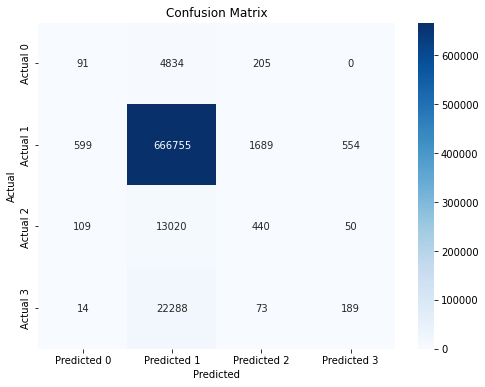

In [10]:
# KNN Confusion matrix

conf_matrix = confusion_matrix(y_test_knn_svm, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=[f'Actual {i}' for i in range(conf_matrix.shape[0])],
                       columns=[f'Predicted {i}' for i in range(conf_matrix.shape[1])])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Logistic Regression

log_reg = LogisticRegression(multi_class='multinomial',random_state=0)
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse,'MSE')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse,'RMSE')
abs_error = mean_absolute_error(y_test, y_pred)
print(abs_error,'MAE')
acc = accuracy_score(y_test, y_pred)
print(acc,'Accuracy')

c:\users\domin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.15333164535595223 MSE
0.39157584879043833 RMSE
0.08985244264393524 MAE
0.9418871587120733 Accuracy


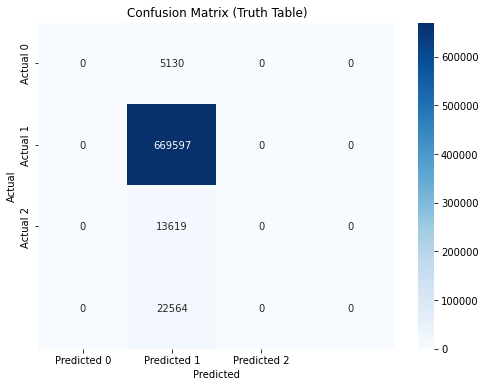

In [12]:
# Logistic Regression Confusion matrix

confusion = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Truth Table)')
plt.show()


In [13]:
# Linear regression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
score = linear_regression.score(X, y)
print('Score',score)
acc = accuracy_score(y_test, y_pred)
print(acc,'Accuracy')
mse = mean_squared_error(y_test, y_pred)
print(mse,'MSE')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse,'RMSE')
abs_error = mean_absolute_error(y_test, y_pred)
print(abs_error,'MAE')

Score 0.006722903042980399
0.9418871587120733 Accuracy
0.15333164535595223 MSE
0.39157584879043833 RMSE
0.08985244264393524 MAE


Confusion Matrix:
[[     0   5130      0      0]
 [     0 669597      0      0]
 [     0  13619      0      0]
 [     0  22564      0      0]]


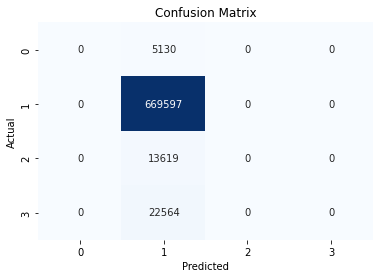

In [14]:
# Linear regression confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Gaussian Naive Bayes

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc,'Accuracy')
mse = mean_squared_error(y_test, y_pred)
print(mse,'MSE')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse,'RMSE')
abs_error = mean_absolute_error(y_test, y_pred)
print(abs_error,'MAE')

0.870962569101574 Accuracy
0.27209070065127794 MSE
0.5216231404484256 RMSE
0.17553276786091065 MAE


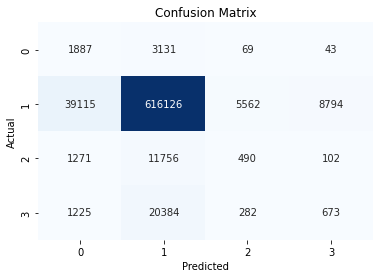

In [16]:
# Gaussian Naive Bayes confusion matrix

plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Decision Tree Classifier

clf = DecisionTreeClassifier(random_state=0)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc,'Accuracy')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse,'RMSE')
abs_error = mean_absolute_error(y_test, y_pred)
print(abs_error,'MAE')                  

0.9251818092304229 Accuracy
0.4689902905654216 RMSE
0.1230929372213079 MAE


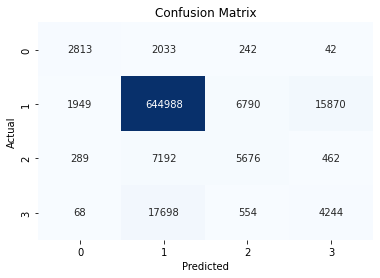

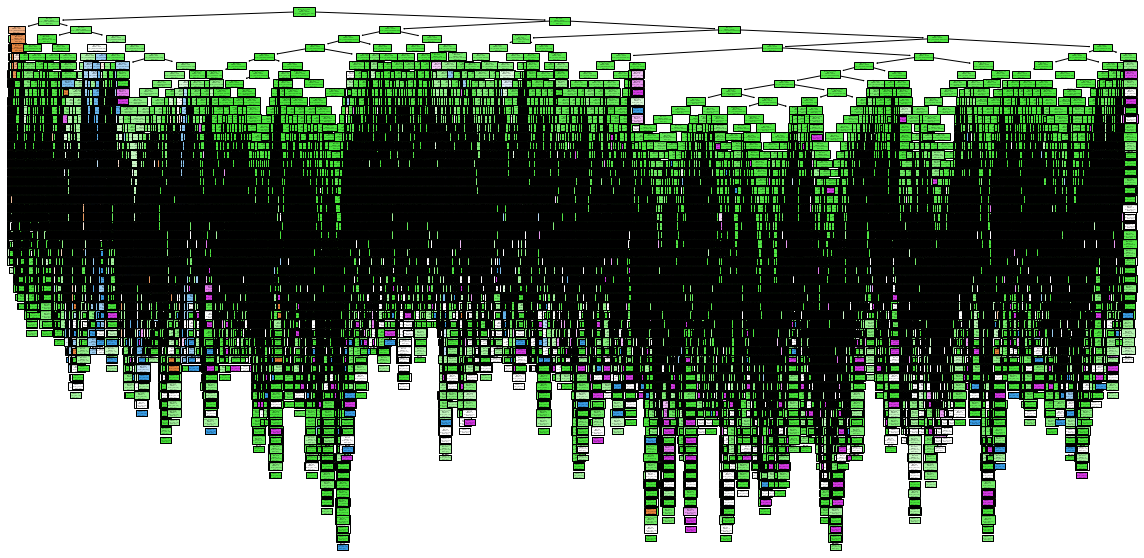

In [18]:
# Decision Tree Classifier Confusion matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Random Forest Classifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc,'Accuracy')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse,'RMSE')
abs_error = mean_absolute_error(y_test, y_pred)
print(abs_error,'MAE') 

0.9418871587120733 Accuracy
0.39157584879043833 RMSE
0.08985244264393524 MAE


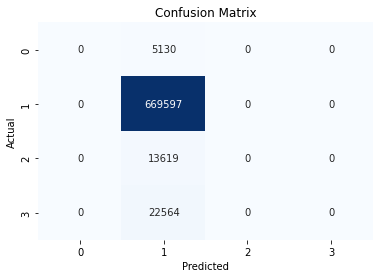

In [20]:
# Random Forest Classifier confuision matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, 
                                 max_depth=1, 
                                 random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc,'Accuracy')

score = clf.score(X_test, y_test)
print(score)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse,'RMSE')
abs_error = mean_absolute_error(y_test, y_pred)
print(abs_error,'MAE') 

0.87396576219212 Accuracy
0.87396576219212
0.5051436766441177 RMSE
0.16820553937910565 MAE


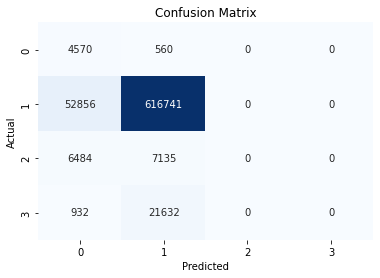

In [22]:
#Gradient Boosting Classifier Confusion matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()